# Cottrell Simulations
Based on the Fortran code found in appendix B of "Electrochemical Methods: Second Edition" by Bard and Faulkner.

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

### Parameter assignment for simulation

In [16]:
# Constants 
l = 100 # Number of mesh points 
DMA = 0.40 # Model Diffusion Coefficient
DMB = DMA # Both species have the same Diffusion coefficients
k_iter = 100 # Number of Time Iteration Points

# Creating arrays for the fractional concentrations
fa_old = np.ones(100) 
fa_new = np.ones(100)
fb_old = np.zeros(100)
fb_new = np.zeros(100)

# Creating arrays for several data sets used in plotting
Z = np.zeros(l) # Current array 
T = np.zeros(l) # Time array
X = np.ones(l) # Distances from the electrode array 
concentration_a = np.zeros(l) # Concentration of oxidized species
concentration_b = np.zeros(l) # Concentration of reduced species
Cox_an = np.zeros(l) # Analytical concentration of oxidized species
Cred_an = np.zeros(l) # Analytical concentration of reduced species
Tspec = 0 # Placeholder for the time used in the analytical concentration expression

### Numerical Simulation

In [17]:
# Loop for determining arrays
for k in range(0, k_iter):

    # Time values for plotting and analytical solutions
    T[k]=((k-0.5)/l) #Populating the time values
    del_t = 0.01 # Time resolution, or the time between points
    T_k = del_t*l # Characteristic time 
    #Tspec = 0.2*T_k # Time used for analytical concentrations, as specified in problem  
    Tspec = 0.2*T_k*10 # Time used that gives very good agreement with simulatiuon


    # Diffusion Into the First Box
    fa_new[0] = fa_old[0] + DMA*(fa_old[1]-fa_old[0])
    fb_new[0] = fb_old[0] + DMA*(fb_old[1]-fb_old[0])

    # Creating a new J_max for each loop that allows for many iterations to grow over time
    J_max = 4.2*np.sqrt(k)

    # Diffusion beyond the first box
    for j in range(1, int(J_max)):
        fa_new[j] = fa_old[j]+DMA*(fa_old[j-1]-2*fa_old[j]+fa_old[j+1])
        fb_new[j] = fb_old[j]+DMA*(fb_old[j-1]-2*fb_old[j]+fb_old[j+1])

    # Faradaic Conversion and Current Flow
    Z[k] = np.sqrt(l/DMA)*fa_new[0]
    fb_new[0] = fb_new[0]+fa_new[0]
    fa_new[0] = 0

    # Set up old arrays for next iteration
    for j in range(0, int(J_max)):
        # X[j] = (j-1)/np.sqrt(DMA*l)
        fa_old[j]=fa_new[j]
        fb_old[j] =fb_new[j]

    # Populating the distance aray
    for j in range(0, l):
        X[j] = (j-1)/np.sqrt(DMA*l)

    # Pulling concentration profiles at a specific iteration point
    if k == 20:
        concentration_a = fa_new
        concentration_b = fb_new
        
    Cox_an[k] = 1*math.erf(X[k]/(2*np.sqrt(DMA*Tspec))) #Analytical concentration of oxidized species, equation 5.2.13 in Bard
    Cred_an[k] = 1-(1*math.erf(X[k]/(2*np.sqrt(DMA*Tspec)))) #Analytical concentration of reduced species, derived from 5.2.13 in Bard

Zcott=1/np.sqrt(np.pi*T) # Current derived from the Cottrell equation
R = Z/Zcott # Ratio of simulation current to Cottrell equation currents

/var/folders/v5/vj19y2_90_n_906sz5k9d6xc0000gq/T/ipykernel_57017/3061374437.py:47: RuntimeWarning: invalid value encountered in sqrt
  Zcott=1/np.sqrt(np.pi*T) # Current derived from the Cottrell equation


## Plots 

### Both Currents on the same plot

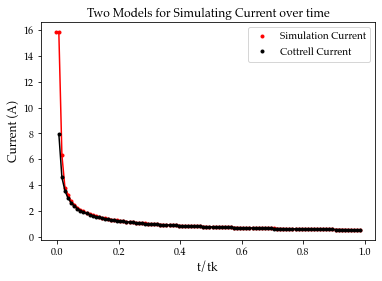

In [18]:
fig = plt.figure(figsize = (6,4))

#Trends of interest
plt.plot(T,Z,'-', color = 'red')
plt.plot(T,Z,'.', color = 'red', label = 'Simulation Current')
plt.plot(T,Zcott, '-', color = 'black')
plt.plot(T,Zcott, '.', color = 'black', label = 'Cottrell Current')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Two Models for Simulating Current over time')
plt.xlabel('t/tk', fontsize = '12')
plt.ylabel('Current (A)', fontsize = '12')

#Legend
plt.legend(loc="upper right")

#SaveFig
plt.savefig('TwoMod.png', dpi=1200)

### Current Ratio Plots

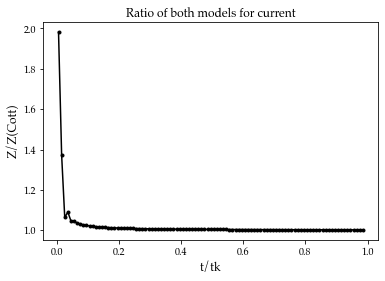

In [19]:
fig = plt.figure(figsize = (6,4))

#Trend 
plt.plot(T,R,'-', color = 'black')
plt.plot(T,R,'.', color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Ratio of both models for current')
plt.xlabel('t/tk', fontsize = '12')
plt.ylabel('Z/Z(Cott)', fontsize = '12')

#SaveFig
plt.savefig('RatioCurrents.png', dpi=1200)

### Concentration Profiles

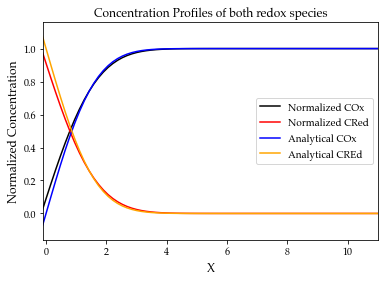

In [21]:
fig = plt.figure(figsize = (6,4))

#Plot limits
plt.xlim(-.1,11)

#Trend 
plt.plot(X,concentration_a,'-', color = 'black', label = 'Normalized COx')
plt.plot(X,concentration_b,'-', color = 'red', label = 'Normalized CRed')
plt.plot(X,Cox_an,'-', color = 'blue', label = 'Analytical COx')
plt.plot(X,Cred_an,'-', color = 'Orange', label = 'Analytical CREd')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Concentration Profiles of both redox species')
plt.xlabel('X', fontsize = '12')
plt.ylabel('Normalized Concentration', fontsize = '12')

#Legend
plt.legend(loc="upper right")

#Legend
plt.legend(loc="best")

#SaveFig
plt.savefig('ConcProfiles.png', dpi=1200)